
 <h1 align="center">Classification Pneumonia</h1>

<h3 align="center">Reut Maslansky & Roi Birger</h3>

<h3>Overview:</h3>

- In this project we want to classify according to lung photography whether a person has pneumonia or not.
We want train a models that would try to learn the pattern of lung in the X-ray scans.

<h3>The DataSet:</h3>

- We use dataset called "chest-xray-pneumonia" from kaggle web.
- The dataset contain 5856 images, split to train and test folders.
Each of the folders contains healthy lung photography versus sick lungs.
Actually, we use maximum 600 images each folder for time efficiency.

<h3>What we want to examine?</h3>

1. Is it possible to develop a model that is classified among lung photographs with high success rates?
2. Which model among the techniques chosen to use will bring the best results most?
3. Is it possible to learn the structure of pneumonia from the photographs?

<h3>Techniques:</h3>

- SVM- Support Vector Machine
- Logistic Regression
- Adaboost
- Random Forest
- KNN- K Nearest Neighbors

<h3>Challenges:</h3>

- The database contained images of different sizes- and to make the prediction more accurate, we decided to edit the images equally - so that they were all the same size so as not to affect the quality of the classification.
- We encountered difficulties of long runtime because the database contained over 5000 images - so as mentioned, we used only about half of them.
- After examination, we noticed an imbalance between the number of images belonging to diseased lungs and the number of images belonging to healthy lungs. We hypothesized that the imbalance might affect the classification results, so we decided to use an equal number of images of each type.

# Code:
### Import all the necessary libraries

In [21]:
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, plot_roc_curve

### Load data

In [22]:
Train_path = 'data/train'
Test_path = 'data/test'

In [23]:
def load_Data(dir):
    Categories = ['NORMAL', 'PNEUMONIA']
    X_arr = []  #input array
    Y_arr = []  #output array
    for i in Categories:
        dem = 1
        print(f'loading... category : {i}')
        path = os.path.join(dir, i)
        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (100, 100, 3))
            X_arr.append(img_resized.flatten() / 255)
            Y_arr.append(Categories.index(i))
            if dem == 600:
                break
            else:
                dem += 1
        print(f'loaded category:{i} successfully')
    print("Completed!")
    return X_arr, Y_arr

In [24]:
x_train, y_train = load_Data(Train_path)

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully
Completed!


In [25]:
x_test, y_test = load_Data(Test_path)

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully
Completed!


### Show some images

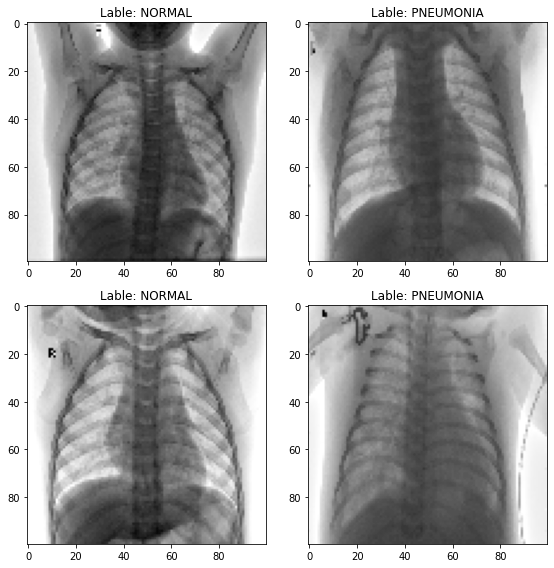

In [26]:
Categories = ['NORMAL', 'PNEUMONIA']

X = []  #input array
Y = []  #output array
for i in Categories:
    dem = 1
    path = os.path.join('data/train', i)
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path, img))
        img = cv2.resize(img, (100, 100))
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        X.append(img)
        Y.append(Categories.index(i))
        if dem == 2:
            break
        else:
            dem += 1

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(8, 8)
for i in range(2):
    for j in range(2):
        if j == 0:
            ax[i, j].imshow(X[i], cmap='gray_r')
            ax[i, j].set_title('Lable: ' + Categories[Y[i]])
        else:
            ax[i, j].imshow(X[len(Y) - 1 - i], cmap='gray_r')
            ax[i, j].set_title('Lable: ' + Categories[Y[len(Y) - 1 - i]])

plt.tight_layout()

<BarContainer object of 2 artists>

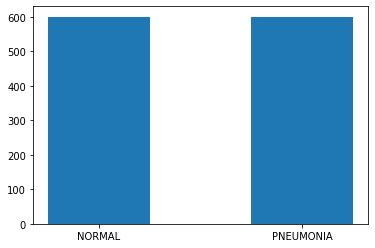

In [27]:
d = Counter(y_train)
plt.bar(['NORMAL', 'PNEUMONIA'], d.values(), width=0.5)

# Training Models

### SVM Model

In [28]:
from sklearn.svm import SVC

SVM = SVC(C=1)
SVM.fit(x_train, y_train)

SVC(C=1)

### Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

LGR = LogisticRegression(C=1)
LGR.fit(x_train, y_train)

LogisticRegression(C=1)

### Adaboost Model

In [30]:
from sklearn.ensemble import AdaBoostClassifier

AB = AdaBoostClassifier()
AB.fit(x_train, y_train)

AdaBoostClassifier()

### k-nearest neighbors Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

### Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Testing Model

### SVM Model

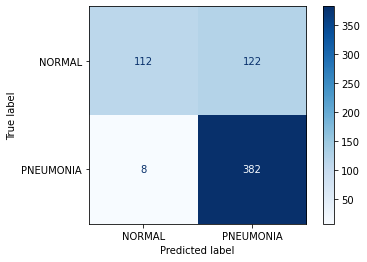

In [33]:
ConfusionMatrixDisplay.from_estimator(SVM, x_test, y_test, display_labels=np.array(["NORMAL", "PNEUMONIA"]),
                                      cmap=plt.cm.Blues)

### Logistic Regression Model

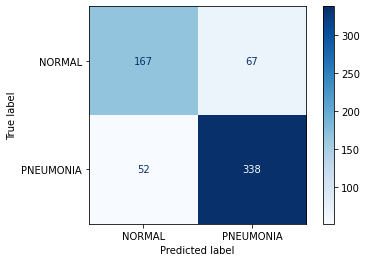

In [34]:
ConfusionMatrixDisplay.from_estimator(LGR, x_test, y_test, display_labels=np.array(["NORMAL", "PNEUMONIA"]),
                                      cmap=plt.cm.Blues)

### Adaboost Model

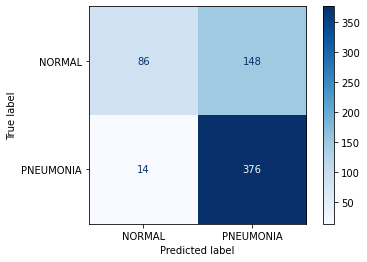

In [35]:
ConfusionMatrixDisplay.from_estimator(AB, x_test, y_test, display_labels=np.array(["NORMAL", "PNEUMONIA"]),
                                      cmap=plt.cm.Blues)

### k-nearest neighbors Model

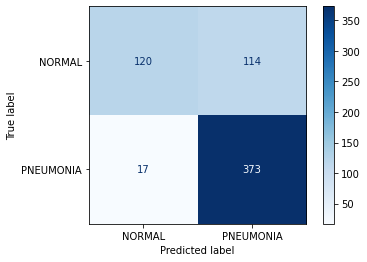

In [36]:
ConfusionMatrixDisplay.from_estimator(KNN, x_test, y_test, display_labels=np.array(["NORMAL", "PNEUMONIA"]),
                                      cmap=plt.cm.Blues)

### Random Forest Model

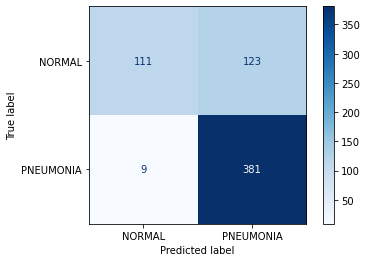

In [37]:
ConfusionMatrixDisplay.from_estimator(RF, x_test, y_test, display_labels=np.array(["NORMAL", "PNEUMONIA"]),
                                      cmap=plt.cm.Blues)

# Statistics
As we can see, the SVC and Random Forest Models have the best classify.
In the other hand, the Adaboost Model has the worst classify.


C:\Users\rmaslansky\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rmaslansky\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rmaslansky\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Functio

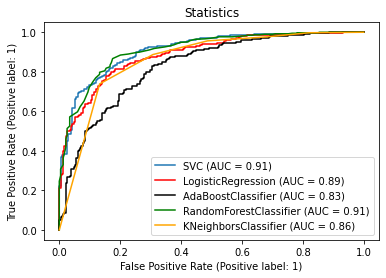

In [38]:
fig = plot_roc_curve(SVM, x_test, y_test)
fig = plot_roc_curve(LGR, x_test, y_test, color='r', ax=fig.ax_)
fig = plot_roc_curve(AB, x_test, y_test, color='black', ax=fig.ax_)
fig = plot_roc_curve(RF, x_test, y_test, color='green', ax=fig.ax_)
fig = plot_roc_curve(KNN, x_test, y_test, color='orange', ax=fig.ax_)

plt.legend()
plt.title("Statistics")
plt.show()